In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from rake_nltk import Rake
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

pd.set_option('display.max_colwidth', None)

df = pd.read_excel("raw data/LG-A9K_REVIEWS.xlsx")

# df = pd.read_csv("raw data/LG-A9K_REVIEWS-.csv", encoding='cp1252')
df.insert(0, 'ID', range(0 + len(df)))
df['REVIEW'] = df['TITLE'] + ". " + df['CONTENT']
df['REVIEW'] = df['REVIEW'].replace(np.nan, '')
df = df.drop(columns=['TITLE', 'CONTENT'])

print(df.head())

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>
[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


   ID RETAILER     PRODUCT  RATING POST_DATE REVIEWER_NAME   
0   0  bestbuy  LG A925KSM       5  ########   Curmudgeon1  \
1   1  bestbuy  LG A925KSM       5  ########    Pilgrim007   
2   2  bestbuy  LG A925KSM       5  ########      MrGadget   
3   3  bestbuy  LG A925KSM       5  ########      TechGeek   
4   4  bestbuy  LG A925KSM       5  ########       DeeGore   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [4]:
# Remove empty strings after colon and add space before Pros and Cons
df['REVIEW'] = df['REVIEW'].apply(lambda x: x.replace(":   ",":").replace(":  ",":").replace(": ",":").replace(":\n\n", ": ").replace(":\n", ": ").replace("\t","").replace("\n-","").replace("\n ","\n"))
df['REVIEW'][0]


df['REVIEW']

0       POWERFUL, LIGHTWEIGHT & EFFICIENT STICK VACUUM. The LG CordZero A925KSM Kompressor Stick Vacuum is similar to some other LG cordless vacuum models, and that is a very good thing. The LG A925KSM is an excellent cordless stick vacuum that performs very well and is very pleasant and easy to use.\n\nThe LG CordZero A925KSM Kompressor arrives very well packed and includes the vacuum motor power head, an aluminum telescoping extension wand (20â€ collapsed, 29.5â€ extended), a universal power nozzle (for carpet and bare floors), a combination tool (with removable brush), a crevice tool, a free-standing / wall mountable, portable storage stand with integral battery charger, two lithium ion rechargeable batteries, a spare pre-filter for the motor and a small brush for cleaning the dirt collection canister and motor housing.\n\nAssembly of the charging stand is straightforward, and LG provides a quantity of printed product documentation. The stand has a weighted base, which I found to 

In [5]:
df['REVIEW'][0]

'POWERFUL, LIGHTWEIGHT & EFFICIENT STICK VACUUM. The LG CordZero A925KSM Kompressor Stick Vacuum is similar to some other LG cordless vacuum models, and that is a very good thing. The LG A925KSM is an excellent cordless stick vacuum that performs very well and is very pleasant and easy to use.\n\nThe LG CordZero A925KSM Kompressor arrives very well packed and includes the vacuum motor power head, an aluminum telescoping extension wand (20â€\x9d collapsed, 29.5â€\x9d extended), a universal power nozzle (for carpet and bare floors), a combination tool (with removable brush), a crevice tool, a free-standing / wall mountable, portable storage stand with integral battery charger, two lithium ion rechargeable batteries, a spare pre-filter for the motor and a small brush for cleaning the dirt collection canister and motor housing.\n\nAssembly of the charging stand is straightforward, and LG provides a quantity of printed product documentation. The stand has a weighted base, which I found to b

In [6]:
# Separate REVIEW into PARAGRAPHS
def separate_paragraphs(review):
    para_list = []
    paragraphs = review.split('\n\n')
    para_list.extend(paragraphs)
    return para_list

df['PARAGRAPHS'] = df['REVIEW'].apply(lambda x: separate_paragraphs(x))

# Remove empty strings from PARAGRAPHS
# df['PARAGRAPHS'] = df['PARAGRAPHS'].apply(lambda x: list(filter(None, x)))
# df['PARAGRAPHS'][0]

df['PARAGRAPHS'][0]

['POWERFUL, LIGHTWEIGHT & EFFICIENT STICK VACUUM. The LG CordZero A925KSM Kompressor Stick Vacuum is similar to some other LG cordless vacuum models, and that is a very good thing. The LG A925KSM is an excellent cordless stick vacuum that performs very well and is very pleasant and easy to use.',
 'The LG CordZero A925KSM Kompressor arrives very well packed and includes the vacuum motor power head, an aluminum telescoping extension wand (20â€\x9d collapsed, 29.5â€\x9d extended), a universal power nozzle (for carpet and bare floors), a combination tool (with removable brush), a crevice tool, a free-standing / wall mountable, portable storage stand with integral battery charger, two lithium ion rechargeable batteries, a spare pre-filter for the motor and a small brush for cleaning the dirt collection canister and motor housing.',
 'Assembly of the charging stand is straightforward, and LG provides a quantity of printed product documentation. The stand has a weighted base, which I found t

In [7]:
# Drop df columns: REVIEW
df = df.drop(columns=['RETAILER', 'PRODUCT','POST_DATE', 'REVIEWER_NAME','REVIEW'])

# Make PARAGRAPHS list to string
# df['PARAGRAPHS'] = df['PARAGRAPHS'].agg(lambda x: ','.join(map(str, x)))
df.head()

# df.insert(1, 'P_ID', range(0 + len(df)))





ID  RATING   
0   0       5  \
1   1       5   
2   2       5   
3   3       5   
4   4       5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [8]:
# explode the PARAGRAPHS Column
df = df.explode('PARAGRAPHS')
df = df.reset_index(drop=True)
# remove empty rows from PARAGRAPHS
df_paragraphs = df[df['PARAGRAPHS'] != '']

df_paragraphs

,ID,RATING,PARAGRAPHS
0,0,5,"POWERFUL, LIGHTWEIGHT & EFFICIENT STICK VACUUM. The LG CordZero A925KSM Kompressor Stick Vacuum is similar to some other LG cordless vacuum models, and that is a very good thing. The LG A925KSM is an excellent cordless stick vacuum that performs very well and is very pleasant and easy to use."
1,0,5,"The LG CordZero A925KSM Kompressor arrives very well packed and includes the vacuum motor power head, an aluminum telescoping extension wand (20â€ collapsed, 29.5â€ extended), a universal power nozzle (for carpet and bare floors), a combination tool (with removable brush), a crevice tool, a free-standing / wall mountable, portable storage stand with integral battery charger, two lithium ion rechargeable batteries, a spare pre-filter for the motor and a small brush for cleaning the dirt collection canister and motor housing."
2,0,5,"Assembly of the charging stand is straightforward, and LG provides a quantity of printed product documentation. The stand has a weighted base, which I found to be very stable. The stand may also be wall mounted. The hardware for wall attachment is included. Notably, all of the included components and accessories are accommodated on the charging stand!"
3,0,5,"The combination tool and crevice tool attachments can be used with or without the telescoping extension wand, easily accommodating cleaning out of reach areas, as well as close-up cleaning tasks such as upholstered furniture. The telescoping wand provides four latching positions. All of the attachments easily snap together and latch securely."
4,0,5,"Cordless stick vacuums are particularly attractive and desirable for their light weight, easy maneuverability and superior convenience. The LG CordZero A925 Kompressor excels in those attributes."
...,...,...,...
2704,1225,5,"The most amazing thing!. I have to say I was blown away by this product. I didn't expect to love it so much, but LG went above and beyond to make this easy for the buyer, and effortless for cleaning. This is likely the best purchase I've made this year."
2705,1226,5,"Perfection. I am obsessed with this vacuum the two recharging batteries, the self cleaning on its on makes it worth it alone. Easy to use and great on all surfaces."
2706,1226,5,"Light weight, doesnâ€™t require lots of space, this is the all time best vacuum I have ever had!!"
2707,1227,5,Great Stick Vaccum. Iâ€™m so in love with my LG Cord stiick vacuum with charging station.It has such a powerful suction.Itâ€™s light weight but so durable .It emptyâ€™s itâ€™s self in a container .It has a charging station which is awesome.This is the best Vacuum iâ€™ve ever had .Itâ€™s amazing .


In [9]:

from transformers import AutoTokenizer, AutoModelForSequenceClassification

from scipy.special import softmax



In [10]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [11]:
from tqdm.notebook import tqdm
def polarity_scores_roberta(review):
    encoded_text = tokenizer(review, padding=True, truncation=True, max_length=512,  return_tensors='pt' )
    encoded_text
    # print(encoded_text)
    output = model(**encoded_text)
    # output
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores
    scores_dict = {
        'negative' : scores[0],
        'neutral' :  scores[1],
        'positive' : scores[2]
    }
    return scores_dict
# polarity_scores_roberta(review)

In [12]:
df_paragraphs.insert(1, 'P_ID', range(0 + len(df_paragraphs)))

df_paragraphs


,ID,P_ID,RATING,PARAGRAPHS
0,0,0,5,"POWERFUL, LIGHTWEIGHT & EFFICIENT STICK VACUUM. The LG CordZero A925KSM Kompressor Stick Vacuum is similar to some other LG cordless vacuum models, and that is a very good thing. The LG A925KSM is an excellent cordless stick vacuum that performs very well and is very pleasant and easy to use."
1,0,1,5,"The LG CordZero A925KSM Kompressor arrives very well packed and includes the vacuum motor power head, an aluminum telescoping extension wand (20â€ collapsed, 29.5â€ extended), a universal power nozzle (for carpet and bare floors), a combination tool (with removable brush), a crevice tool, a free-standing / wall mountable, portable storage stand with integral battery charger, two lithium ion rechargeable batteries, a spare pre-filter for the motor and a small brush for cleaning the dirt collection canister and motor housing."
2,0,2,5,"Assembly of the charging stand is straightforward, and LG provides a quantity of printed product documentation. The stand has a weighted base, which I found to be very stable. The stand may also be wall mounted. The hardware for wall attachment is included. Notably, all of the included components and accessories are accommodated on the charging stand!"
3,0,3,5,"The combination tool and crevice tool attachments can be used with or without the telescoping extension wand, easily accommodating cleaning out of reach areas, as well as close-up cleaning tasks such as upholstered furniture. The telescoping wand provides four latching positions. All of the attachments easily snap together and latch securely."
4,0,4,5,"Cordless stick vacuums are particularly attractive and desirable for their light weight, easy maneuverability and superior convenience. The LG CordZero A925 Kompressor excels in those attributes."
...,...,...,...,...
2704,1225,2373,5,"The most amazing thing!. I have to say I was blown away by this product. I didn't expect to love it so much, but LG went above and beyond to make this easy for the buyer, and effortless for cleaning. This is likely the best purchase I've made this year."
2705,1226,2374,5,"Perfection. I am obsessed with this vacuum the two recharging batteries, the self cleaning on its on makes it worth it alone. Easy to use and great on all surfaces."
2706,1226,2375,5,"Light weight, doesnâ€™t require lots of space, this is the all time best vacuum I have ever had!!"
2707,1227,2376,5,Great Stick Vaccum. Iâ€™m so in love with my LG Cord stiick vacuum with charging station.It has such a powerful suction.Itâ€™s light weight but so durable .It emptyâ€™s itâ€™s self in a container .It has a charging station which is awesome.This is the best Vacuum iâ€™ve ever had .Itâ€™s amazing .


In [13]:
res = {}
for i, row in tqdm(df_paragraphs.iterrows(), total=len(df_paragraphs)):
    try:
        text = row['PARAGRAPHS']
        myid = row['P_ID']
        # vader_results = sia.polarity_scores(text)
        roberta_result = polarity_scores_roberta(text)
        res[myid] = {**roberta_result}
    except RuntimeError:
        print(f'Broke for id {myid}')

results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'P_ID'})
results_df = results_df.merge(df_paragraphs, how='left')
results_df.head()

  0%|          | 0/2378 [00:00<?, ?it/s]

,P_ID,negative,neutral,positive,ID,RATING,PARAGRAPHS
0,0,0.001277,0.012046,0.986677,0,5,"POWERFUL, LIGHTWEIGHT & EFFICIENT STICK VACUUM. The LG CordZero A925KSM Kompressor Stick Vacuum is similar to some other LG cordless vacuum models, and that is a very good thing. The LG A925KSM is an excellent cordless stick vacuum that performs very well and is very pleasant and easy to use."
1,1,0.002429,0.218874,0.778697,0,5,"The LG CordZero A925KSM Kompressor arrives very well packed and includes the vacuum motor power head, an aluminum telescoping extension wand (20â€ collapsed, 29.5â€ extended), a universal power nozzle (for carpet and bare floors), a combination tool (with removable brush), a crevice tool, a free-standing / wall mountable, portable storage stand with integral battery charger, two lithium ion rechargeable batteries, a spare pre-filter for the motor and a small brush for cleaning the dirt collection canister and motor housing."
2,2,0.003077,0.128773,0.868150,0,5,"Assembly of the charging stand is straightforward, and LG provides a quantity of printed product documentation. The stand has a weighted base, which I found to be very stable. The stand may also be wall mounted. The hardware for wall attachment is included. Notably, all of the included components and accessories are accommodated on the charging stand!"
3,3,0.007611,0.393929,0.598460,0,5,"The combination tool and crevice tool attachments can be used with or without the telescoping extension wand, easily accommodating cleaning out of reach areas, as well as close-up cleaning tasks such as upholstered furniture. The telescoping wand provides four latching positions. All of the attachments easily snap together and latch securely."
4,4,0.001160,0.025889,0.972951,0,5,"Cordless stick vacuums are particularly attractive and desirable for their light weight, easy maneuverability and superior convenience. The LG CordZero A925 Kompressor excels in those attributes."


In [16]:
results_df

,P_ID,negative,neutral,positive,ID,RATING,PARAGRAPHS
0,0,0.001277,0.012046,0.986677,0,5,"POWERFUL, LIGHTWEIGHT & EFFICIENT STICK VACUUM. The LG CordZero A925KSM Kompressor Stick Vacuum is similar to some other LG cordless vacuum models, and that is a very good thing. The LG A925KSM is an excellent cordless stick vacuum that performs very well and is very pleasant and easy to use."
1,1,0.002429,0.218874,0.778697,0,5,"The LG CordZero A925KSM Kompressor arrives very well packed and includes the vacuum motor power head, an aluminum telescoping extension wand (20â€ collapsed, 29.5â€ extended), a universal power nozzle (for carpet and bare floors), a combination tool (with removable brush), a crevice tool, a free-standing / wall mountable, portable storage stand with integral battery charger, two lithium ion rechargeable batteries, a spare pre-filter for the motor and a small brush for cleaning the dirt collection canister and motor housing."
2,2,0.003077,0.128773,0.868150,0,5,"Assembly of the charging stand is straightforward, and LG provides a quantity of printed product documentation. The stand has a weighted base, which I found to be very stable. The stand may also be wall mounted. The hardware for wall attachment is included. Notably, all of the included components and accessories are accommodated on the charging stand!"
3,3,0.007611,0.393929,0.598460,0,5,"The combination tool and crevice tool attachments can be used with or without the telescoping extension wand, easily accommodating cleaning out of reach areas, as well as close-up cleaning tasks such as upholstered furniture. The telescoping wand provides four latching positions. All of the attachments easily snap together and latch securely."
4,4,0.001160,0.025889,0.972951,0,5,"Cordless stick vacuums are particularly attractive and desirable for their light weight, easy maneuverability and superior convenience. The LG CordZero A925 Kompressor excels in those attributes."
...,...,...,...,...,...,...,...
2373,2373,0.002555,0.007411,0.990034,1225,5,"The most amazing thing!. I have to say I was blown away by this product. I didn't expect to love it so much, but LG went above and beyond to make this easy for the buyer, and effortless for cleaning. This is likely the best purchase I've made this year."
2374,2374,0.003715,0.018851,0.977434,1226,5,"Perfection. I am obsessed with this vacuum the two recharging batteries, the self cleaning on its on makes it worth it alone. Easy to use and great on all surfaces."
2375,2375,0.003056,0.020801,0.976143,1226,5,"Light weight, doesnâ€™t require lots of space, this is the all time best vacuum I have ever had!!"
2376,2376,0.001588,0.006727,0.991684,1227,5,Great Stick Vaccum. Iâ€™m so in love with my LG Cord stiick vacuum with charging station.It has such a powerful suction.Itâ€™s light weight but so durable .It emptyâ€™s itâ€™s self in a container .It has a charging station which is awesome.This is the best Vacuum iâ€™ve ever had .Itâ€™s amazing .


<function matplotlib.pyplot.show(close=None, block=None)>

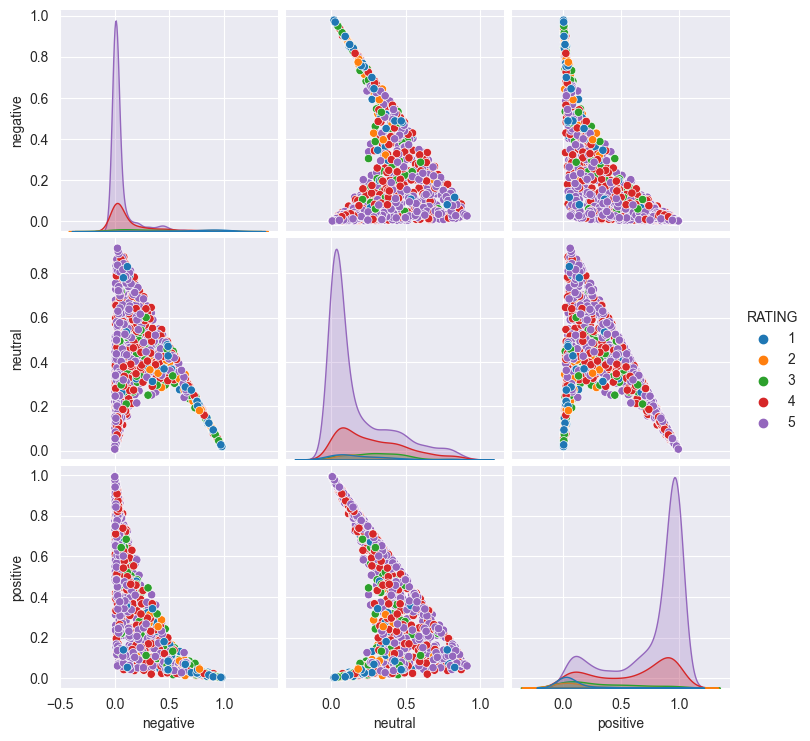

In [14]:
sns.pairplot(data=results_df,
             vars=['negative','neutral','positive'],
             hue='RATING',
             palette='tab10'
             )

plt.show

In [12]:
# Replace 'but' with '.' to separate negative and positive sentences that come after 'but'.
# df['REVIEW'] = df['REVIEW'].str.replace('but', '. But')
# df['REVIEW'] = df['REVIEW'].str.replace('however', '. However')

def separate_sentences(review):
    sent_list = []
    sentences = sent_tokenize(review)
    sent_list.extend(sentences)
    return sent_list

df['SENTENCES'] = df['REVIEW'].apply(lambda x: separate_sentences(x))

# Convert df['SENTENCES'] to strings
# df['SENTENCES_STRING'] = df['SENTENCES'].agg(lambda x: ','.join(map(str, x)))


# Drop df columns: REVIEW
df = df.drop(columns=['RETAILER', 'PRODUCT','POST_DATE', 'REVIEWER_NAME'])


df


KeyError: 'REVIEW'

In [ ]:
# Make SENTECES column in front of ID column
# cols = df.columns.tolist()
# cols = cols[-1:] + cols[:-1]
# df = df[cols]



In [ ]:
sid = SentimentIntensityAnalyzer()


df['COMPOUND_OVERALL'] = df['REVIEW'].apply(lambda x: sid.polarity_scores(str(x))['compound'])
df = df.drop(columns=['REVIEW'])
df

In [ ]:
rake_nltk_var = Rake()

def extract_keywords(review):
    rake_nltk_var.extract_keywords_from_text(str(review))
    keyword_extracted = rake_nltk_var.get_ranked_phrases()
    return keyword_extracted

df['KEYWORDS'] = df['SENTENCES'].apply(lambda x: extract_keywords(x))

df

In [ ]:
# explode the SENTENCES column
df =  df.set_index(['ID']).apply(pd.Series.explode).reset_index()

df





In [ ]:
sid = SentimentIntensityAnalyzer()


df['COMPOUND_SENT'] = df['SENTENCES'].apply(lambda x: sid.polarity_scores(str(x))['compound'])
df['POSITIVE_SENT'] = df['SENTENCES'].apply(lambda x: sid.polarity_scores(str(x))['pos'])
df['NEGATIVE_SENT'] = df['SENTENCES'].apply(lambda x: sid.polarity_scores(str(x))['neg'])
df['NEUTRAL_SENT'] = df['SENTENCES'].apply(lambda x: sid.polarity_scores(str(x))['neu'])
df

In [ ]:
# Function to group by ID and WHERE compound is less than 0
def negative_sentences(df):
    return df[df['COMPOUND'] < 0 & df['NEGATIVE'] > 0]
grouped_negative = df.groupby('ID').apply(negative_sentences)

grouped_negative

In [ ]:
rake_nltk_var = Rake()

def extract_keywords(review):
    rake_nltk_var.extract_keywords_from_text(str(review))
    keyword_extracted = rake_nltk_var.get_ranked_phrases()
    return keyword_extracted

df['KEYWORDS'] = df['SENTENCES'].apply(lambda x: extract_keywords(x))

df

In [ ]:
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

sent_list = []
text = """The LG A9 CordZero is the latest in LG’s stick vacuum cleaner models.  I have one of the earliest versions and for the most part was happy with it, but there were a couple of buggy things I didn’t like and this one seems to have cleared those up. The CordZero comes with several accessories and mine came with the main vacuum head (10.2 inches wide) with extension pipe, a second battery, a spare air filter (one is already inserted), a crevice tool and another with a brush, along with a cleaning brush to help clean the canister out.  A stand is also included which is very handy as you can set the main container unit in it to charge the battery and hold it.  I use mine on it’s included stand on the floor, but you can mount it on the wall if you prefer.

The CordZero is smaller compared to some other stick vacuums, so has a smaller dirt container on it.  My older model would get easily clogged with dirt and frankly was a little bit of a pain to clean out.  The newer A9 model has a lever which they call a Kompressor lever, and you just slide it down a couple of times when emptying the bin, and it forces anything stuck in the upper area out – MUCH easier than before.  Being smaller makes it easier to handle as it doesn’t weight much, and the main head swivels and pivots easily around furniture and gets into smaller areas.  Unfortunately, there is no LED light on it to light up your path, though.  It will let you know when the air filter needs to be changed, but they last a good while.  The roller in the main vacuum head slides out for cleaning as well.

You have three levels of power (normal, power, and turbo), so your battery life will vary depending on what you use.  Normal can get you from 40-60 minutes, but I find this is best for just light duty work.  Power mode is noticeably stronger, and you’ll get from 20-30 minutes per charge on that setting.  The Turbo mode is the strongest and works the best, but you’ll drain the battery in just 6-7 minutes using this.  Having the second battery is essential for this machine, but since the stand can charge both of them at the same time, you’ll be topped off when you need to use it.  Again, I find the Power mode to be the sweet spot of good cleaning power and battery power.  The handle is easy to hold, and the buttons easy to reach while using it (via your thumb).  At only just over 10 inches, the main vacuum head won’t cover huge areas per swath, so if you have HUGE rooms and a lot of them, you might need to look for a larger model, but for many, this one and the two batteries should work. And note – this is NOT for wet vacuuming – just dry dirt, dust, hair, etc.

You can download the “LG ThinQ” app from Apple or Google with this model, and it will connect via WiFi to the vacuum (2.4 Ghz only), so after creating an account with it and picking the item you have, you can monitor how often you’ve cleaned it, if the filter is getting clogged up, or run diagnostics should you feel there is an issue.  Handy to have to monitor the status of the vacuum and easy enough to navigate through once you get it installed, though it was a bit buggy and unnecessarily fiddly to get connected and working initially for me (eventually it kicked in, though).

Overall I really like this updated model.  It works as well or slightly better than the original, the Kompressor lever makes cleaning it out much easier, and the size is perfect for many.  My only complaint that remains with this one is that the main cleaning head isn’t so great with certain larger items (hair if you get an indoor haircut, nuts, etc), so you have to slightly lift up the head and pull it backward over those items to catch them.  Not a game changer, but something to be aware of. Other than that, it works very well on my carpet and hardwood.  Look for sale prices but most of these aren’t inexpensive, but it’s worth it for what you get."""

text = text.replace("but", ".")

sentences = sent_tokenize(text)
sent_list.extend(sentences)

sent_list

for sent in sent_list:
    sid = SentimentIntensityAnalyzer()
    print(sent)
    ss = sid.polarity_scores(sent)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

In [ ]:
# Separate Reviews into Sentences




#






# Sentiment Analysis for Each Sentence using vader_lexicon
for sent in sent_list:
    sid = SentimentIntensityAnalyzer()
    print(sent)
    ss = sid.polarity_scores(sent)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()